# Data processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [12]:
df = pd.read_csv('CarsImagesLabeled.csv')
df

,filepath,xmin,xmax,ymin,ymax
0,./images\N1.xml,1095,1397,648,735
1,./images\N100.xml,132,302,305,351
2,./images\N101.xml,20,139,128,162
3,./images\N102.xml,162,317,208,250
4,./images\N103.xml,811,1069,671,728
...,...,...,...,...,...
222,./images\N95.xml,19,413,172,395
223,./images\N96.xml,119,369,134,196
224,./images\N97.xml,175,291,228,254
225,./images\N98.xml,565,673,209,236


In [13]:
df.head()

,filepath,xmin,xmax,ymin,ymax
0,./images\N1.xml,1095,1397,648,735
1,./images\N100.xml,132,302,305,351
2,./images\N101.xml,20,139,128,162
3,./images\N102.xml,162,317,208,250
4,./images\N103.xml,811,1069,671,728


In [14]:
import xml.etree.ElementTree as xet

In [15]:
def getfilename(filename):
    filename = xet.parse(filename).getroot().find('filename').text
    image_path = os.path.join('./images',filename)
    return image_path

In [16]:
filename = df['filepath'][0]
filename

'./images\\N1.xml'

In [17]:
#directory = '../1-data_labeling/'
filename = filename.replace('\\','/')
#full_path = directory+filename[2:]
full_path = filename
getfilename(full_path)

'./images/N1.jpeg'

In [18]:
for i in range(len(df['filepath'])):
    #df['filepath'][i] = directory + df['filepath'].iloc[i][2::]
    filename = df['filepath'].iloc[i].replace('\\','/')
    df['filepath'][i] = filename

<ipython-input-18-49a59abd375b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['filepath'][i] = filename


In [19]:
df

,filepath,xmin,xmax,ymin,ymax
0,./images/N1.xml,1095,1397,648,735
1,./images/N100.xml,132,302,305,351
2,./images/N101.xml,20,139,128,162
3,./images/N102.xml,162,317,208,250
4,./images/N103.xml,811,1069,671,728
...,...,...,...,...,...
222,./images/N95.xml,19,413,172,395
223,./images/N96.xml,119,369,134,196
224,./images/N97.xml,175,291,228,254
225,./images/N98.xml,565,673,209,236


In [20]:
image_path = list(df['filepath'].apply(getfilename))
image_path

['./images/N1.jpeg',
 './images/N100.jpeg',
 './images/N101.jpeg',
 './images/N102.jpeg',
 './images/N103.jpeg',
 './images/N104.jpeg',
 './images/N105.jpeg',
 './images/N106.jpeg',
 './images/N107.jpeg',
 './images/N108.jpeg',
 './images/N109.jpeg',
 './images/N11.jpeg',
 './images/N110.jpeg',
 './images/N111.jpeg',
 './images/N112.jpeg',
 './images/N113.jpeg',
 './images/N114.jpeg',
 './images/N116.jpeg',
 './images/N117.jpeg',
 './images/N118.jpeg',
 './images/N119.jpeg',
 './images/N12.jpeg',
 './images/N120.jpeg',
 './images/N121.jpeg',
 './images/N122.jpeg',
 './images/N123.jpeg',
 './images/N124.jpeg',
 './images/N126.jpeg',
 './images/N127.jpeg',
 './images/N128.jpeg',
 './images/N129.jpeg',
 './images/N130.jpeg',
 './images/N131.jpeg',
 './images/N132.jpeg',
 './images/N133.jpeg',
 './images/N134.jpeg',
 './images/N135.jpeg',
 './images/N136.jpeg',
 './images/N137.jpeg',
 './images/N138.jpeg',
 './images/N139.jpeg',
 './images/N14.jpeg',
 './images/N140.jpeg',
 './images/N141.

In [21]:
len(image_path)

227

verify image and output

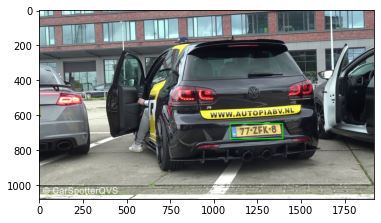

In [22]:
#img = cv2.imread('../1-data_labeling/' + image_path[0][2:])
img = cv2.imread(image_path[0])
gg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
pixels = np.array(gg)
cv2.rectangle(pixels,(df['xmin'][0], df['ymin'][0]), (df['xmax'][0], df['ymax'][0]), (0,255,0), 3)
plt.imshow(pixels)

In [23]:
"""img = cv2.imread('../1-data_labeling/images/N1.jpeg')
cv2.rectangle(img,(1095,648),(1397,735),(0,255,0),3)
plt.imshow(img)"""

"img = cv2.imread('../1-data_labeling/images/N1.jpeg')\ncv2.rectangle(img,(1095,648),(1397,735),(0,255,0),3)\nplt.imshow(img)"

In [24]:
"""img = cv2.imread(image_path[0])
cv2.imshow('exemple',img)
cv2.waitKey(0)
cv2.destroyAllWindows()"""

"img = cv2.imread(image_path[0])\ncv2.imshow('exemple',img)\ncv2.waitKey(0)\ncv2.destroyAllWindows()"

In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [26]:
labels = df.iloc[:,1:].values

In [27]:
data = []
output = []
for ind in range(len(image_path)):
    #image = '../1-data_labeling/' + image_path[ind][2:]
    image = image_path[ind]
    image_arr = cv2.imread(image)
    w, h, d = image_arr.shape
    #preprocessing
    load_image = load_img(image, target_size=(224,224)) #displaying image in 224,224 
    load_image_arr = img_to_array(load_image) #converting the image to pixels
    norm_load_image_arr = load_image_arr/255.0 #normalization
    #normalization to labels
    xmin, xmax, ymin, ymax = labels[ind]
    nxmin, nxmax = xmin/w, xmax/w
    nymin, nymax = ymin/h, ymax/h
    label_norm = (nxmin, nxmax, nymin, nymax) #normalized output
    data.append(norm_load_image_arr)
    output.append(label_norm)

In [28]:
len(data), len(output)

(227, 227)

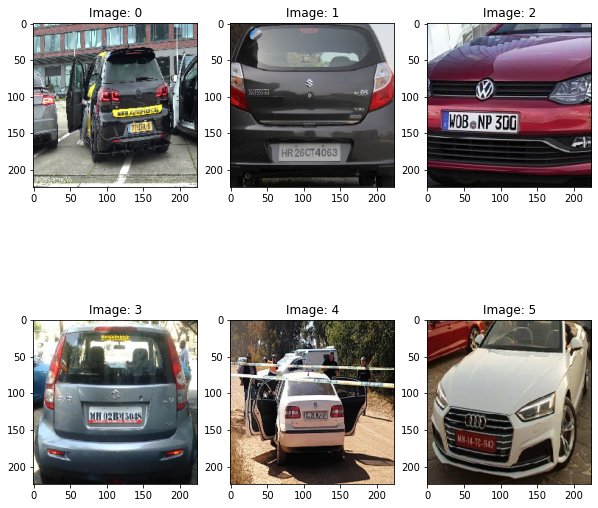

In [29]:
fig = plt.figure(figsize=(10, 10))
for i in range(6):
    fig.add_subplot(2, 3, i+1)
    plt.imshow(data[i])
    #plt.axis('off')
    plt.title("Image: "+str(i))

In [30]:
x = np.array(data, dtype=np.float32)
y = np.array(output, dtype=np.float32)

In [31]:
x.shape, y.shape
#for x.shape, 227: number of images, 224: size of width and height of the image (number of pixels), 3: rgb levels
#for y.shape, 227: number of image labels, 4: number of labels (xmin, xmax, ymin, ymax) 

((227, 224, 224, 3), (227, 4))

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((181, 224, 224, 3), (46, 224, 224, 3), (181, 4), (46, 4))

# Deep learning Model

In [33]:
from tensorflow.keras.applications import MobileNetV2, InceptionV3, InceptionResNetV2
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.models import Model
import tensorflow as tf

In [34]:
inception_resnet = InceptionResNetV2(weights="imagenet", include_top=False,
                                     input_tensor=Input(shape=(224,224,3)))
inception_resnet.trainable = False
headmodel = inception_resnet.output
headmodel = Flatten()(headmodel)
headmodel = Dense(500,activation="relu")(headmodel)
headmodel = Dense(250,activation="relu")(headmodel)
headmodel = Dense(4, activation='sigmoid')(headmodel)
#model
model = Model(inputs=inception_resnet.input, outputs=headmodel)

219055592/219055592 [==============================] - 8s 0us/step


In [35]:
#compile model
model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4))
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

# Training Model

In [36]:
from tensorflow.keras.callbacks import TensorBoard

In [37]:
tfb = TensorBoard('object_detection')

In [38]:
history = model.fit(x=x_train, y=y_train, batch_size=10, epochs=100, 
                   validation_data=(x_test, y_test), callbacks=[tfb])

Epoch 1/100
19/19 [==============================] - 23s 321ms/step - loss: 0.1547 - val_loss: 0.1855
Epoch 2/100
19/19 [==============================] - 2s 112ms/step - loss: 0.1355 - val_loss: 0.1054
Epoch 3/100
19/19 [==============================] - 2s 89ms/step - loss: 0.0940 - val_loss: 0.0741
Epoch 4/100
19/19 [==============================] - 2s 106ms/step - loss: 0.0718 - val_loss: 0.0704
Epoch 5/100
19/19 [==============================] - 2s 89ms/step - loss: 0.0557 - val_loss: 0.0447
Epoch 6/100
19/19 [==============================] - 2s 89ms/step - loss: 0.0517 - val_loss: 0.0521
Epoch 7/100
19/19 [==============================] - 2s 90ms/step - loss: 0.0515 - val_loss: 0.0504
Epoch 8/100
19/19 [==============================] - 2s 89ms/step - loss: 0.0465 - val_loss: 0.0408
Epoch 9/100
19/19 [==============================] - 2s 106ms/step - loss: 0.0418 - val_loss: 0.0440
Epoch 10/100
19/19 [==============================] - 2s 108ms/step - loss: 0.0386 - val_loss: 

In [39]:
history = model.fit(x=x_train, y=y_train, batch_size=10, epochs=200, 
                   validation_data=(x_test, y_test), callbacks=[tfb], initial_epoch = 101)

Epoch 102/200
19/19 [==============================] - 2s 97ms/step - loss: 0.0262 - val_loss: 0.0301
Epoch 103/200
19/19 [==============================] - 2s 95ms/step - loss: 0.0257 - val_loss: 0.0249
Epoch 104/200
19/19 [==============================] - 2s 111ms/step - loss: 0.0242 - val_loss: 0.0274
Epoch 105/200
19/19 [==============================] - 2s 111ms/step - loss: 0.0238 - val_loss: 0.0271
Epoch 106/200
19/19 [==============================] - 2s 95ms/step - loss: 0.0241 - val_loss: 0.0234
Epoch 107/200
19/19 [==============================] - 2s 94ms/step - loss: 0.0232 - val_loss: 0.0224
Epoch 108/200
19/19 [==============================] - 2s 111ms/step - loss: 0.0226 - val_loss: 0.0261
Epoch 109/200
19/19 [==============================] - 2s 111ms/step - loss: 0.0229 - val_loss: 0.0267
Epoch 110/200
19/19 [==============================] - 2s 111ms/step - loss: 0.0224 - val_loss: 0.0228
Epoch 111/200
19/19 [==============================] - 2s 111ms/step - loss: 

In [40]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [41]:
model.save('/content/gdrive/MyDrive/models/object_detection.h5')